<a href="https://colab.research.google.com/github/2004Likhitha/AIML/blob/main/AIML_III_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [24]:
def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c and d for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -2, 3, 5]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

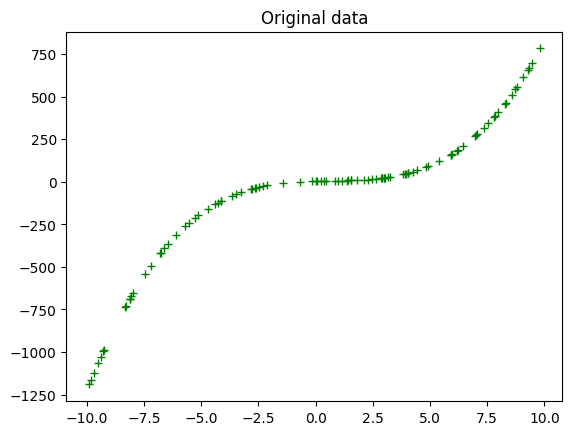

In [25]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [26]:
def eval_3rd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c and d for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """


    y = eval_3rd_degree(coeffs, x)
    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.uniform(interval_min, interval_max)  # Generate a random number within the interval
    return jit_val

# Generate data points with jitter
xs = []
ys = []
for x in hundred_xs:
    y = eval_3rd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

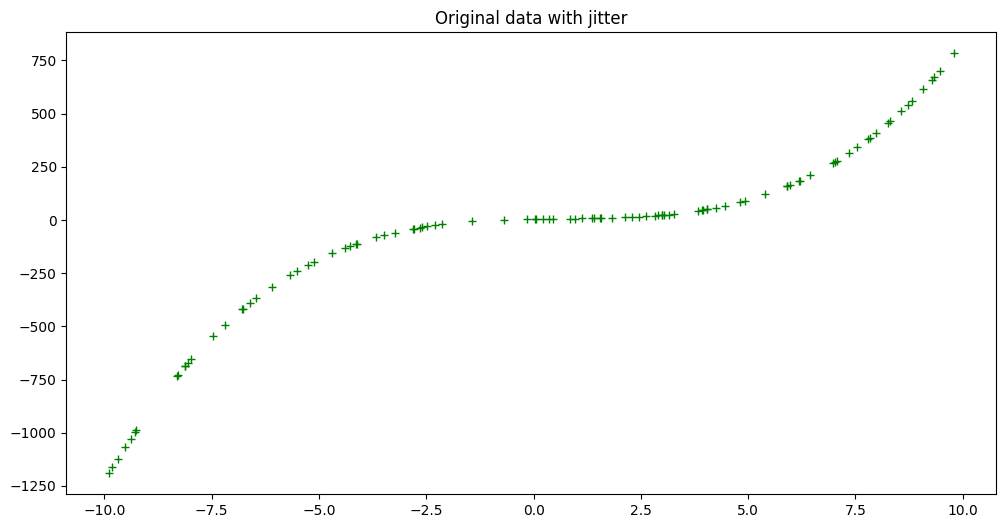

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [30]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return np.mean((np.array(ys) - np.array(y_bar)) ** 2)

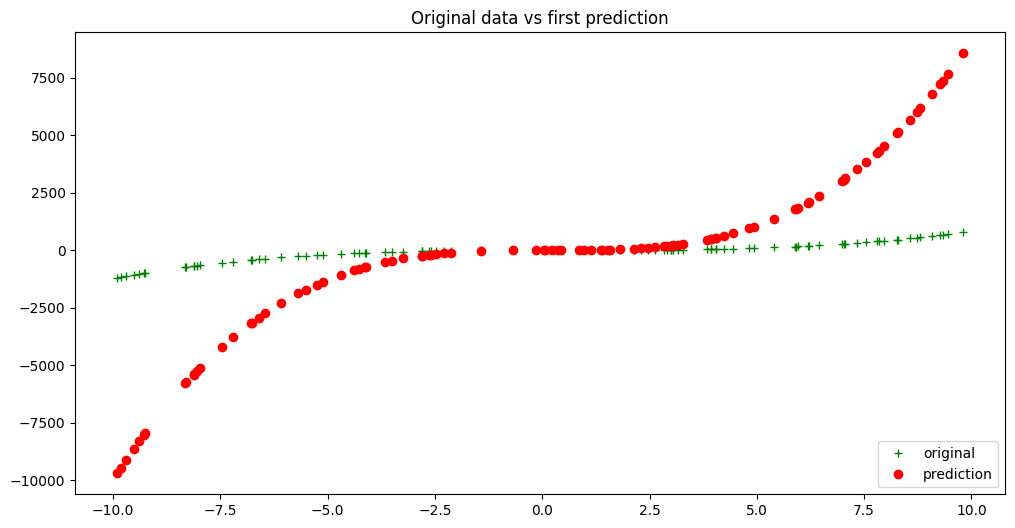

In [31]:
# Initial random coefficients for a 3rd-degree polynomial
rand_coeffs = [random.uniform(-10, 10) for _ in range(4)]

# Generate predictions using the random coefficients
y_bar = [eval_3rd_degree(rand_coeffs, x) for x in hundred_xs]

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [32]:
# Initial model loss
initial_model_loss = loss_mse(ys, y_bar)
print(f"Initial model loss: {initial_model_loss}")

Initial model loss: 10987616.572607426


We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [33]:
def calc_gradient_3rd_poly(rand_coeffs, inputs_x, outputs_y):
    """
    calculates the gradient for a third degree polynomial.

    Args:
        rand_coeffs: a, b, c, and d, for a 3rd-degree polynomial [y = ax^3 + bx^2 + cx + d]
        inputs_x: x input data points
        outputs_y: actual y output points

    Returns: Calculated gradients for the 3rd-degree polynomial, as a tuple of its parts for a, b, c, d respectively.

    """

    gradients = [0, 0, 0, 0]  # Initialize gradients for a, b, c, d
    n = len(inputs_x)

    # Calculate predictions
    y_bars = [eval_3rd_degree(rand_coeffs, x) for x in inputs_x]

    # Compute gradients for each coefficient
    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        error = y - y_bar
        gradients[0] += -2 * x**3 * error / n
        gradients[1] += -2 * x**2 * error / n
        gradients[2] += -2 * x * error / n
        gradients[3] += -2 * error / n

    return tuple(gradients)

In [34]:
# Gradient calculation and weight update
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]

new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# Update with these new coeffs
new_y_bar = [eval_3rd_degree(new_model_coeffs, x) for x in hundred_xs]
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Updated model loss: {updated_model_loss} vs Initial model loss: {initial_model_loss}")

New model coeffs: (-248.72083558223756, -2.456634828042198, -8.16614064845836, -1.2451318682835277)
Updated model loss: 9491392220.370556 vs Initial model loss: 10987616.572607426


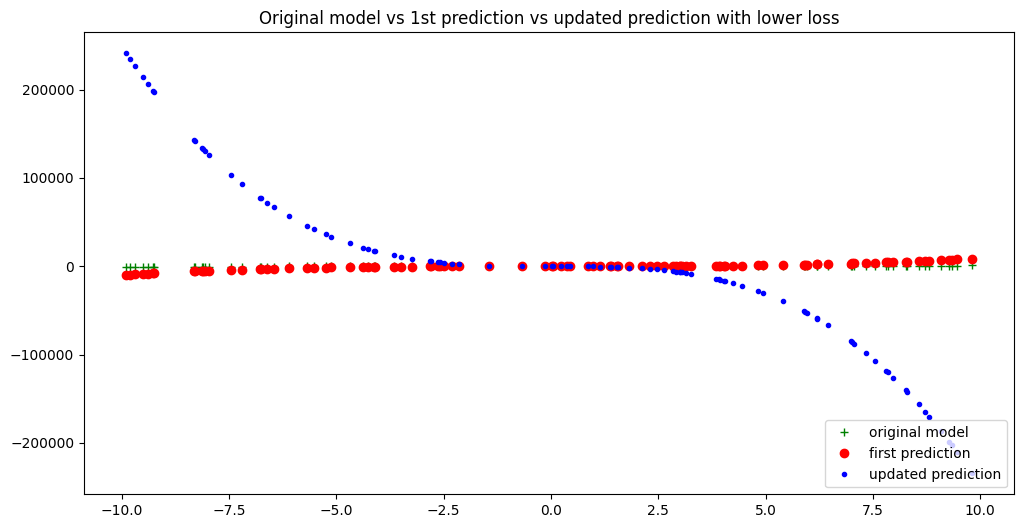

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original model')
plt.plot(xs, y_bar, 'ro', label='first prediction')
plt.plot(xs, new_y_bar, 'b.', label='updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [36]:
def gradient_descent_3rd_poly(epochs, lr):
    """
    Perform gradient descent for a third-degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly(rand_coeffs_to_test, hundred_xs, ys)
        rand_coeffs_to_test = [rand_coeffs_to_test[i] - lr * loss[i] for i in range(4)]
        losses.append(loss_mse(ys, [eval_3rd_degree(rand_coeffs_to_test, x) for x in hundred_xs]))

    return losses[-1], rand_coeffs_to_test, [eval_3rd_degree(rand_coeffs_to_test, x) for x in hundred_xs], losses

In [38]:
GD = gradient_descent_3rd_poly(30000, 0.0003)

<ipython-input-30-95adc4b58241>:12: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(ys) - np.array(y_bar)) ** 2)
<ipython-input-33-155e282a7e85>:23: RuntimeWarning: overflow encountered in scalar multiply
  gradients[0] += -2 * x**3 * error / n
<ipython-input-33-155e282a7e85>:24: RuntimeWarning: invalid value encountered in scalar add
  gradients[1] += -2 * x**2 * error / n
<ipython-input-33-155e282a7e85>:26: RuntimeWarning: invalid value encountered in scalar add
  gradients[3] += -2 * error / n
<ipython-input-36-c99fcf006ce0>:15: RuntimeWarning: invalid value encountered in scalar subtract
  rand_coeffs_to_test = [rand_coeffs_to_test[i] - lr * loss[i] for i in range(4)]


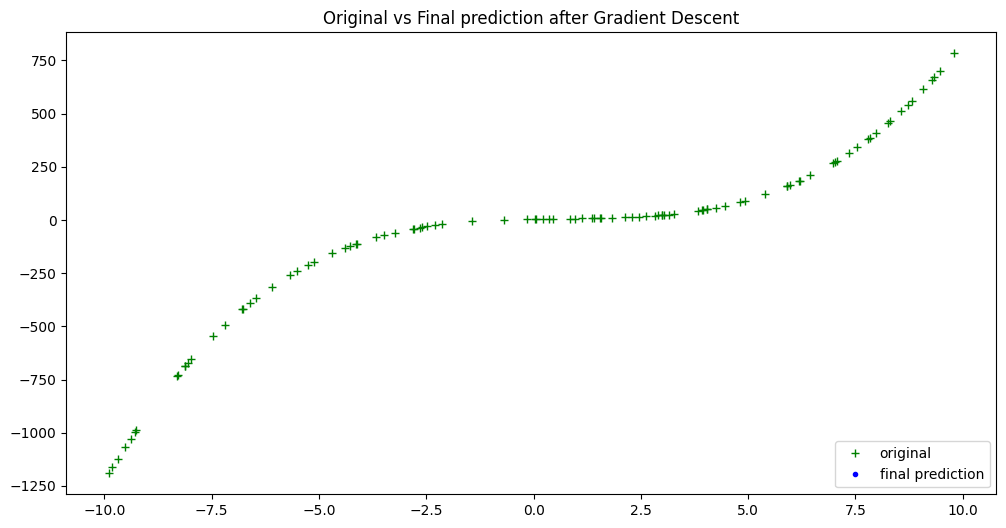

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD[2], 'b.', label='final prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [40]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: [nan, nan, nan, nan]
Original Coefficients: [1, -2, 3, 5]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


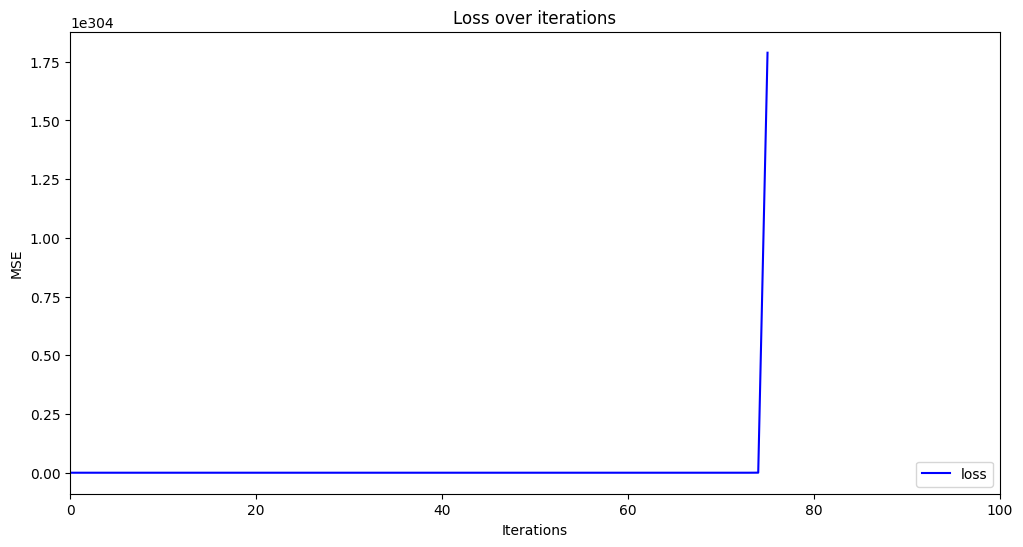

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label='loss')
plt.xlim((0, 100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Loss over iterations')
plt.legend(loc="lower right")
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

- For small learning rate, the convergence will be very slow. The loss will decrease gradually, requiring many more iterations to reach a satisfactory minimum. This is because small steps are being taken towards the minimum.

- For moderate learning rate, the convergence is more optimal, requiring fewer iterations than the small learning rate to reach the minimum. The loss should steadily decrease without oscillations, indicating convergence.

- For large learning rate, the model is likely to diverge or oscillate, resulting in an increasing or fluctuating loss. Large steps may cause the model to "overshoot" the minimum repeatedly, preventing convergence.

3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?

- Depending on the starting point, gradient descent may converge to different local minima or the same minimum.
The final coefficients and the loss might vary based on the initial values, showing how sensitive the optimization is to initialization for higher-degree polynomials.
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



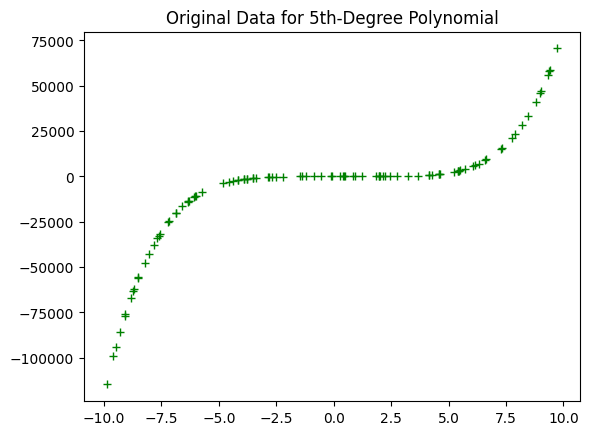


Testing with Initialization: [0, 0, 0, 0, 0, 0]


<ipython-input-42-4cf31d8b6a0f>:51: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-42-4cf31d8b6a0f>:73: RuntimeWarning: overflow encountered in scalar add
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]
<ipython-input-42-4cf31d8b6a0f>:73: RuntimeWarning: invalid value encountered in scalar add
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


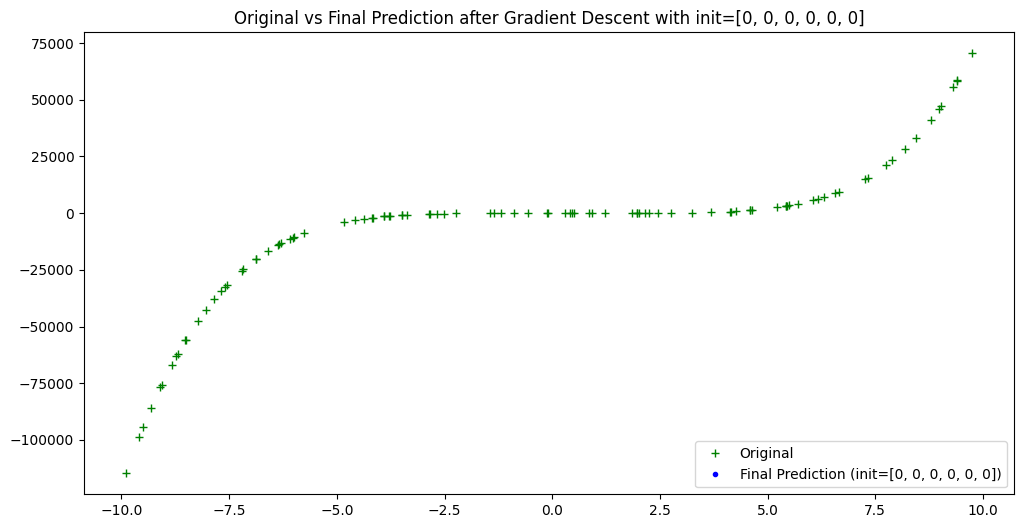

Final Coefficients predicted with init=[0, 0, 0, 0, 0, 0]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[0, 0, 0, 0, 0, 0]: nan

Testing with Initialization: [1, 1, 1, 1, 1, 1]


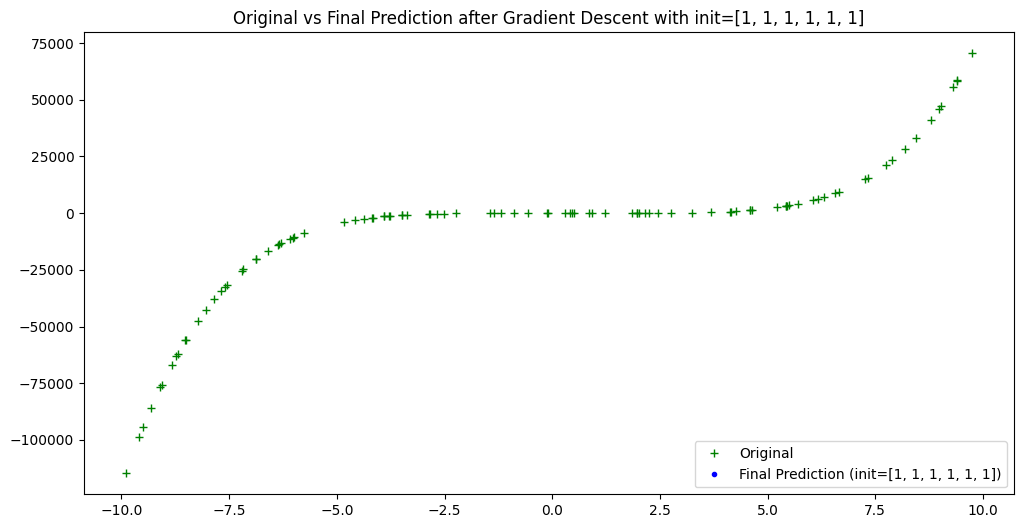

Final Coefficients predicted with init=[1, 1, 1, 1, 1, 1]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[1, 1, 1, 1, 1, 1]: nan

Testing with Initialization: [10, -10, 10, -10, 10, -10]


<ipython-input-42-4cf31d8b6a0f>:73: RuntimeWarning: overflow encountered in multiply
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


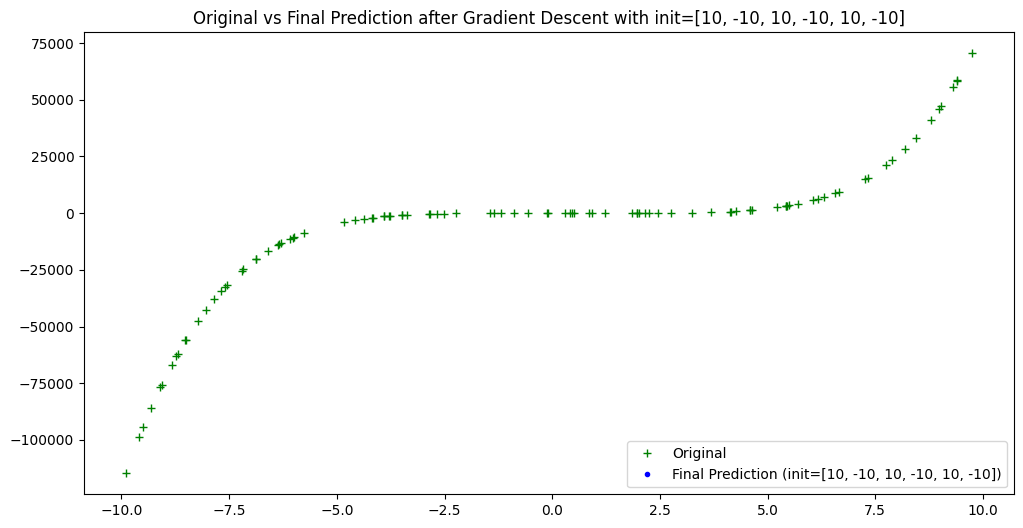

Final Coefficients predicted with init=[10, -10, 10, -10, 10, -10]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[10, -10, 10, -10, 10, -10]: nan

Testing with Initialization: [5, 5, 5, 5, 5, 5]


<ipython-input-42-4cf31d8b6a0f>:51: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-42-4cf31d8b6a0f>:73: RuntimeWarning: overflow encountered in scalar multiply
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


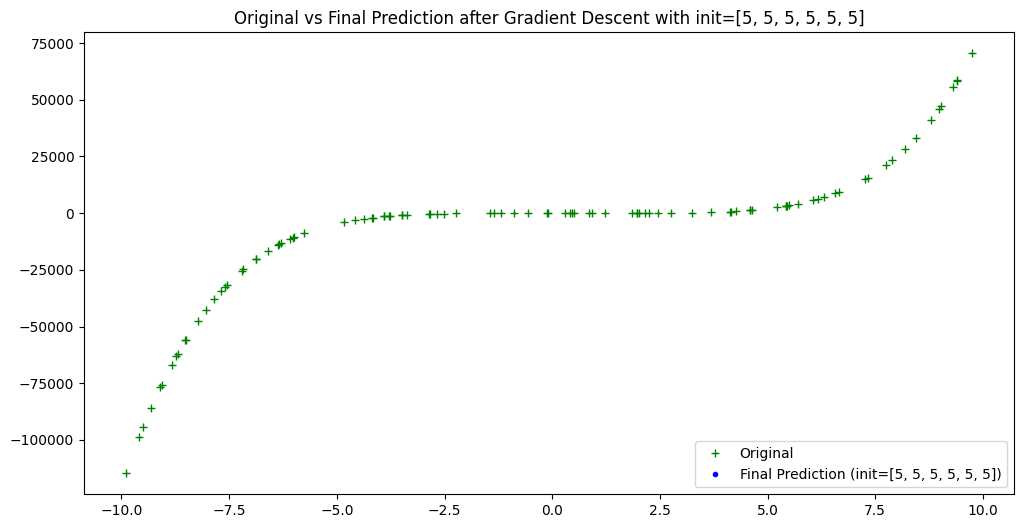

Final Coefficients predicted with init=[5, 5, 5, 5, 5, 5]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[5, 5, 5, 5, 5, 5]: nan


In [42]:
# Modifying the Code for a 5th-Degree Polynomial
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Function to evaluate a 5th-degree polynomial
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

# Generating random data points for x
hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -2, 1, 0, 3, -5]  # Example coefficients for a 5th-degree polynomial

# Generating original data
xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

# Plotting original data
plt.plot(xs, ys, 'g+')
plt.title('Original Data for 5th-Degree Polynomial')
plt.show()

# Function to calculate Mean Squared Error (MSE) Loss
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) ** 2) / len(ys)

# Function to perform gradient descent for the 5th-degree polynomial
def gradient_descent_5th_poly(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a 5th-degree polynomial.

    Args:
        epochs: Number of iterations to perform.
        lr: Learning rate.
        initial_coeffs: Initial coefficients for the polynomial.

    Returns:
        Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    coeffs = initial_coeffs
    losses = []

    for i in range(epochs):
        # Gradient calculation
        y_bars = eval_5th_degree(coeffs, hundred_xs)
        errors = ys - y_bars
        gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]

        # Update coefficients
        coeffs = [coeffs[j] - lr * gradients[j] for j in range(6)]

        # Calculate loss
        new_y_bar = eval_5th_degree(coeffs, hundred_xs)
        loss = loss_mse(ys, new_y_bar)
        losses.append(loss)

    return loss, coeffs, new_y_bar, losses

# Experiment with different initializations
initializations = [
    [0, 0, 0, 0, 0, 0],  # All zeros
    [1, 1, 1, 1, 1, 1],  # All ones
    [10, -10, 10, -10, 10, -10],  # Alternating large values
    [5, 5, 5, 5, 5, 5],  # All fives
]

learning_rate = 0.0001
epochs = 5000

for init in initializations:
    print(f"\nTesting with Initialization: {init}")
    GD = gradient_descent_5th_poly(epochs, learning_rate, init)

    # Plot original data vs final prediction
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='Original')
    plt.plot(xs, GD[2], 'b.', label=f'Final Prediction (init={init})')
    plt.title(f'Original vs Final Prediction after Gradient Descent with init={init}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Final Coefficients predicted with init={init}: {GD[1]}")
    print(f"Final Model Loss with init={init}: {GD[0]}")


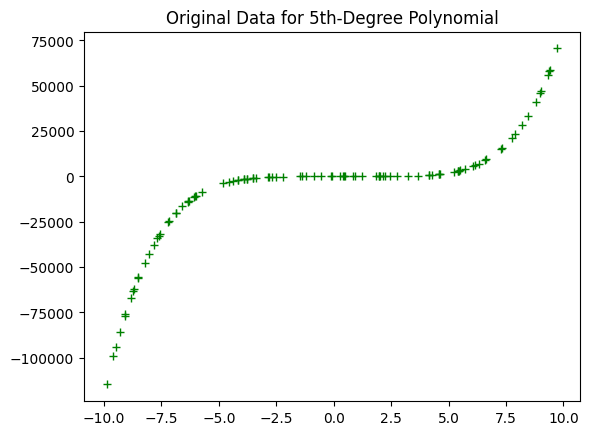


Testing with Initialization: [0, 0, 0, 0, 0, 0]


<ipython-input-43-ed0dd3a88d12>:51: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-43-ed0dd3a88d12>:73: RuntimeWarning: overflow encountered in scalar add
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]
<ipython-input-43-ed0dd3a88d12>:73: RuntimeWarning: invalid value encountered in scalar add
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


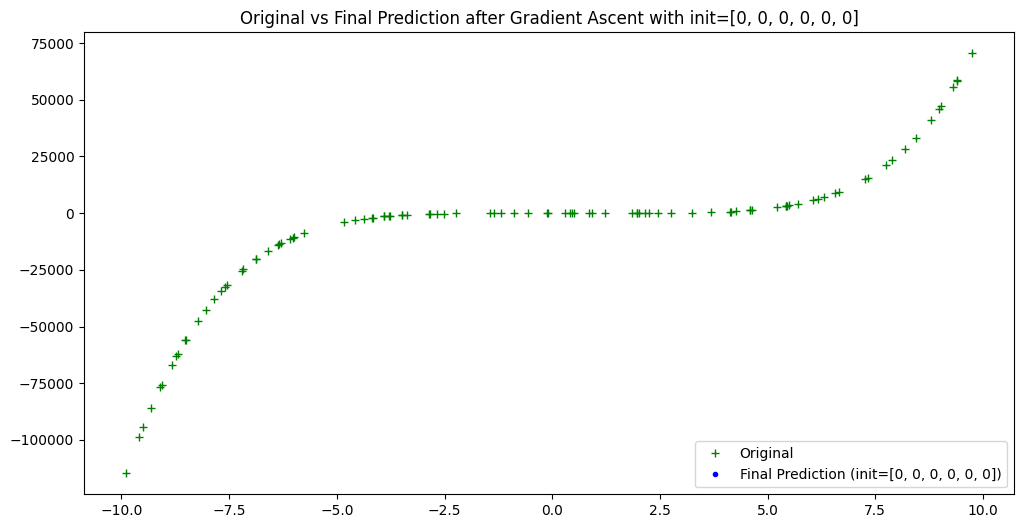

Final Coefficients predicted with init=[0, 0, 0, 0, 0, 0]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[0, 0, 0, 0, 0, 0]: nan

Testing with Initialization: [1, 1, 1, 1, 1, 1]


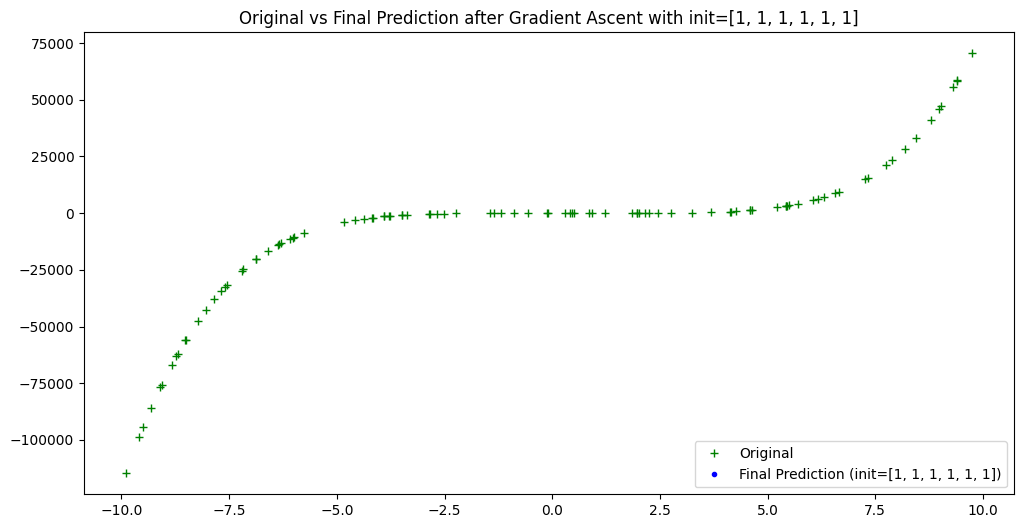

Final Coefficients predicted with init=[1, 1, 1, 1, 1, 1]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[1, 1, 1, 1, 1, 1]: nan

Testing with Initialization: [10, -10, 10, -10, 10, -10]


<ipython-input-43-ed0dd3a88d12>:73: RuntimeWarning: overflow encountered in multiply
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


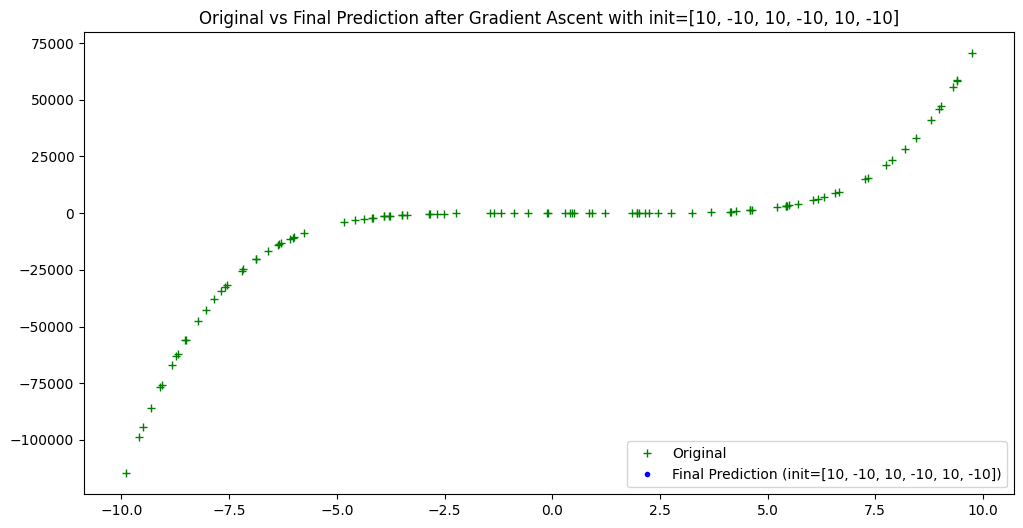

Final Coefficients predicted with init=[10, -10, 10, -10, 10, -10]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[10, -10, 10, -10, 10, -10]: nan

Testing with Initialization: [5, 5, 5, 5, 5, 5]


<ipython-input-43-ed0dd3a88d12>:51: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-43-ed0dd3a88d12>:73: RuntimeWarning: overflow encountered in scalar multiply
  gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]


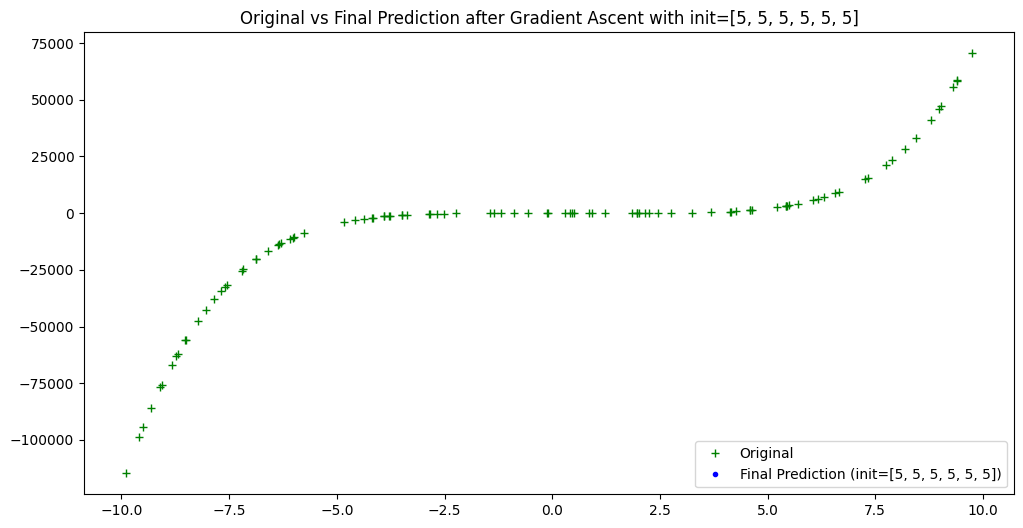

Final Coefficients predicted with init=[5, 5, 5, 5, 5, 5]: [nan, nan, nan, nan, nan, nan]
Final Model Loss with init=[5, 5, 5, 5, 5, 5]: nan


In [43]:
# Modifying the algorithm to find a maximum of a function instead of a minimum
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Function to evaluate a 5th-degree polynomial
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

# Generating random data points for x
hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -2, 1, 0, 3, -5]  # Example coefficients for a 5th-degree polynomial

# Generating original data
xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

# Plotting original data
plt.plot(xs, ys, 'g+')
plt.title('Original Data for 5th-Degree Polynomial')
plt.show()

# Function to calculate Mean Squared Error (MSE) Loss
def loss_mse(ys, y_bar):
    return sum((ys - y_bar) ** 2) / len(ys)

# Function to perform gradient ascent for the 5th-degree polynomial
def gradient_ascent_5th_poly(epochs, lr, initial_coeffs):
    """
    Perform gradient ascent for a 5th-degree polynomial.

    Args:
        epochs: Number of iterations to perform.
        lr: Learning rate.
        initial_coeffs: Initial coefficients for the polynomial.

    Returns:
        Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    coeffs = initial_coeffs
    losses = []

    for i in range(epochs):
        # Gradient calculation
        y_bars = eval_5th_degree(coeffs, hundred_xs)
        errors = ys - y_bars
        gradients = [-2 * sum((x ** (5 - j)) * errors) / len(errors) for j in range(6)]

        # Update coefficients by adding (gradient ascent)
        coeffs = [coeffs[j] + lr * gradients[j] for j in range(6)]

        # Calculate loss
        new_y_bar = eval_5th_degree(coeffs, hundred_xs)
        loss = loss_mse(ys, new_y_bar)
        losses.append(loss)

    return loss, coeffs, new_y_bar, losses

# Experiment with different initializations
initializations = [
    [0, 0, 0, 0, 0, 0],  # All zeros
    [1, 1, 1, 1, 1, 1],  # All ones
    [10, -10, 10, -10, 10, -10],  # Alternating large values
    [5, 5, 5, 5, 5, 5],  # All fives
]

learning_rate = 0.0001
epochs = 5000

for init in initializations:
    print(f"\nTesting with Initialization: {init}")
    GA = gradient_ascent_5th_poly(epochs, learning_rate, init)

    # Plot original data vs final prediction
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='Original')
    plt.plot(xs, GA[2], 'b.', label=f'Final Prediction (init={init})')
    plt.title(f'Original vs Final Prediction after Gradient Ascent with init={init}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Final Coefficients predicted with init={init}: {GA[1]}")
    print(f"Final Model Loss with init={init}: {GA[0]}")


## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

Ans : No, it is not necessary to shuffle the training data.
- In full batch gradient descent, the entire training dataset is used to compute the gradient of the cost function at each iteration. Since the entire dataset is considered at once, the gradient calculated is based on all the training samples.
-  Shuffling the training data is beneficial when using stochastic gradient descent (SGD) or mini-batch gradient descent because these methods use only a subset (or single sample) of the training data to compute the gradient at each step. Shuffling ensures that the model does not learn in a biased way based on the order of the data and helps in better convergence.
- Since full batch gradient descent uses the entire dataset, the gradient is calculated using all the samples regardless of their order. The optimization path does not change if the data is shuffled because the gradient is the same in each epoch.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

Ans : Yes, my friend is correct. When using mini-batch gradient descent, we must shuffle our training set before training. Mini-batch gradient descent iteratively performs updates of model weights where each small batch of the training dataset feeds into model weight updates. That is, the gradients are computed w.r.t. the samples comprising a mini-batch.

If the training data is not shuffled and is ordered with all dog images first and all cat images afterward, each mini-batch will contain only dog images for the first part of training and only cat images for the latter part.
This creates a problem because the model will learn only from one class (e.g., "dog") for several iterations, causing it to be heavily biased toward that class initially. After that, it will start learning from the other class ("cat") and might need to "unlearn" the bias created earlier, making the learning process inefficient and possibly leading to poor convergence.